In [5]:
import numpy as np
from PIL import Image
import os, glob, random

outfile = "./fruits/photos.npz" 
max_photo = 100 
photo_size = 32 
x = [] 
y = [] 

def main():
    glob_files("./fruits/apple", 0)
    glob_files("./fruits/cherry", 1)
    glob_files("./fruits/grape", 2)
    glob_files("./fruits/lemon", 3)
    glob_files("./fruits/peach", 4)
    glob_files("./fruits/strawberry", 5)
    np.savez(outfile, x=x, y=y)
    print("保存しました:" + outfile, len(x))

def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1
        
        img = Image.open(f)
        img = img.convert("RGB") 
        img = img.resize((photo_size, photo_size)) 
        img = np.asarray(img)
        x.append(img)
        y.append(label)

if __name__ == '__main__':
    main()


保存しました:./fruits/photos.npz 600


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

# CNNモデル
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


水増し前= 480
水増し後= 11520
Train on 11520 samples, validate on 120 samples
Epoch 1/20
11520/11520 [==============================] - 24s 2ms/step - loss: 0.9450 - acc: 0.6287 - val_loss: 1.0061 - val_acc: 0.6333
Epoch 2/20
11520/11520 [==============================] - 24s 2ms/step - loss: 0.5029 - acc: 0.8107 - val_loss: 0.7372 - val_acc: 0.7333
Epoch 3/20
11520/11520 [==============================] - 24s 2ms/step - loss: 0.3217 - acc: 0.8832 - val_loss: 0.4272 - val_acc: 0.8667
Epoch 4/20
11520/11520 [==============================] - 24s 2ms/step - loss: 0.2156 - acc: 0.9243 - val_loss: 0.5668 - val_acc: 0.8250
Epoch 5/20
11520/11520 [==============================] - 24s 2ms/step - loss: 0.1543 - acc: 0.9519 - val_loss: 0.4401 - val_acc: 0.8583
Epoch 6/20
11520/11520 [==============================] - 24s 2ms/step - loss: 0.1086 - acc: 0.9668 - val_loss: 0.4275 - val_acc: 0.8667
Epoch 7/20
11520/11520 [==============================] - 24s 2ms/step - loss: 0.0925 - acc: 0.9746 - val_lo

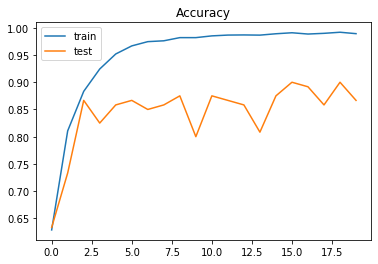

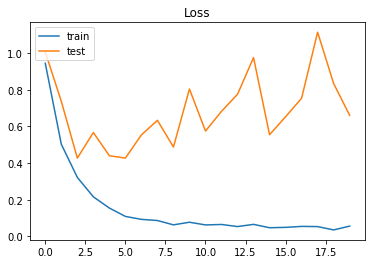

In [8]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力
im_rows = 32 
im_cols = 32 
im_color = 3 
in_shape = (im_rows, im_cols, im_color)
nb_classes = 6

photos = np.load('./fruits/photos.npz')
x = photos['x']
y = photos['y']


x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255

y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)


x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        
        center = (16, 16) 
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)


print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))


model = get_model(in_shape, nb_classes)


hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./fruits/photos-model.hdf5')


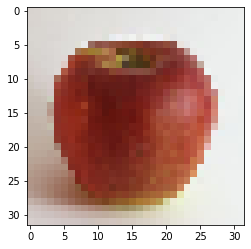

この写真は、 りんご です！
可能性は、 100 %


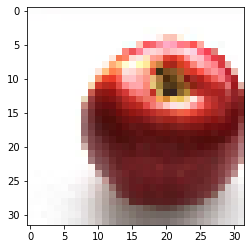

この写真は、 りんご です！
可能性は、 99 %


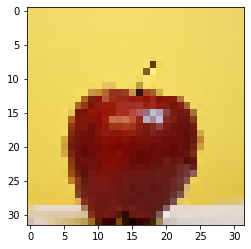

この写真は、 りんご です！
可能性は、 99 %


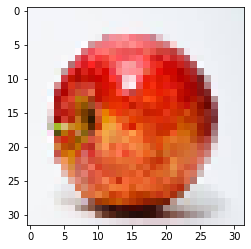

この写真は、 りんご です！
可能性は、 100 %


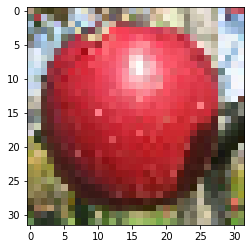

この写真は、 りんご です！
可能性は、 100 %


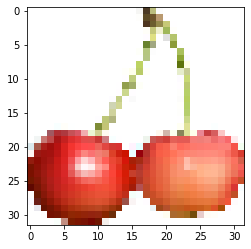

この写真は、 さくらんぼ です！
可能性は、 100 %


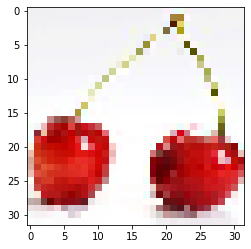

この写真は、 さくらんぼ です！
可能性は、 100 %


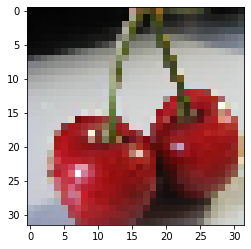

この写真は、 さくらんぼ です！
可能性は、 100 %


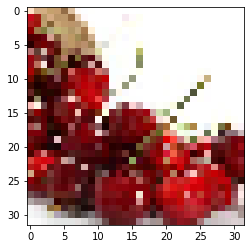

この写真は、 さくらんぼ です！
可能性は、 100 %


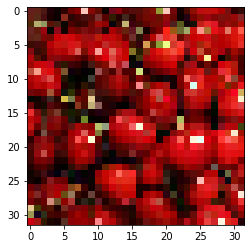

この写真は、 さくらんぼ です！
可能性は、 99 %


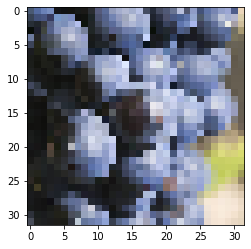

この写真は、 ぶどう です！
可能性は、 100 %


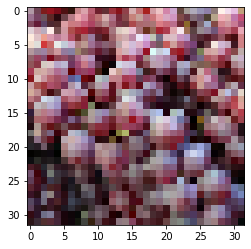

この写真は、 ぶどう です！
可能性は、 100 %


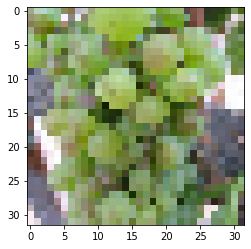

この写真は、 ぶどう です！
可能性は、 99 %


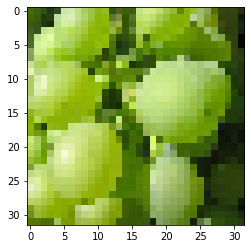

この写真は、 ぶどう です！
可能性は、 99 %


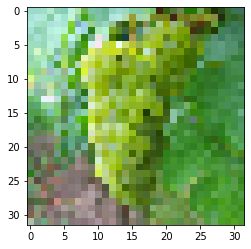

この写真は、 ぶどう です！
可能性は、 99 %


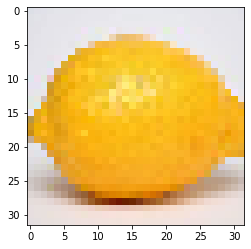

この写真は、 レモン です！
可能性は、 100 %


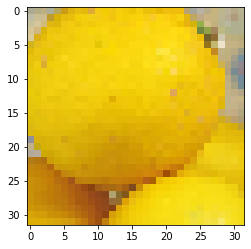

この写真は、 レモン です！
可能性は、 100 %


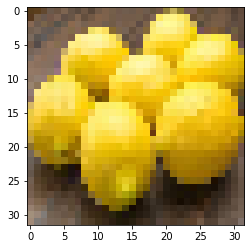

この写真は、 レモン です！
可能性は、 100 %


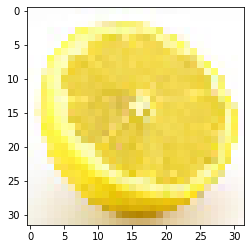

この写真は、 レモン です！
可能性は、 100 %


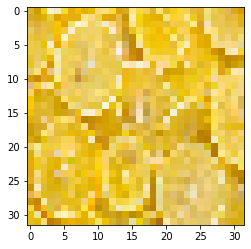

この写真は、 レモン です！
可能性は、 99 %


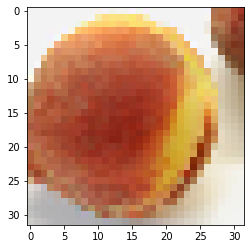

この写真は、 桃 です！
可能性は、 99 %


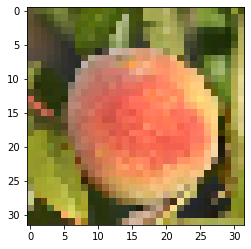

この写真は、 桃 です！
可能性は、 100 %


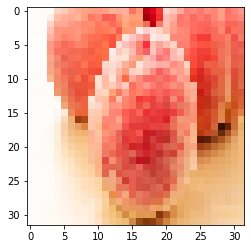

この写真は、 桃 です！
可能性は、 99 %


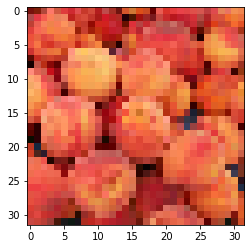

この写真は、 桃 です！
可能性は、 100 %


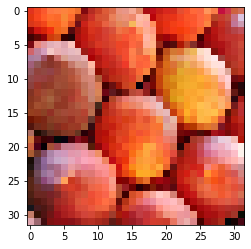

この写真は、 桃 です！
可能性は、 100 %


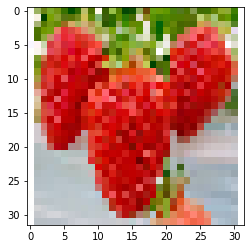

この写真は、 いちご です！
可能性は、 100 %


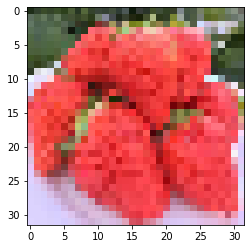

この写真は、 いちご です！
可能性は、 100 %


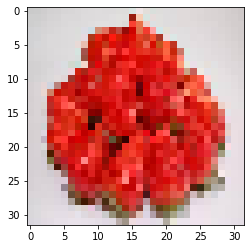

この写真は、 いちご です！
可能性は、 99 %


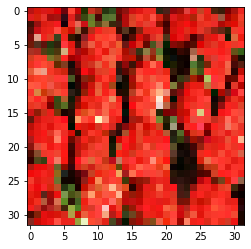

この写真は、 いちご です！
可能性は、 100 %


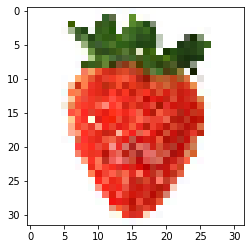

この写真は、 いちご です！
可能性は、 100 %


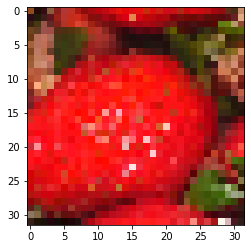

この写真は、 いちご です！
可能性は、 100 %


In [12]:
import os 
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 6

LABELS = ["りんご", "さくらんぼ", "ぶどう", "レモン", "桃", "いちご"]

# 保存したCNNモデルを読み込む
model = get_model(in_shape, nb_classes)
model.load_weights('./fruits/photos-model.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    print("この写真は、", LABELS[idx], "です！")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    files = os.listdir('./fruits/images')
    images = len(files)
    for i in range(images):
        check_photo_str('./fruits/images/image_' + str(i) + '.jpg')
